# Import libraries

In [ ]:
pip install pystout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random
from linearmodels.panel import PanelOLS
import pystout

# Load dataset

In [ ]:
upload = files.upload()
df = pd.read_csv('/content/AhmadiLevot_full.csv')

Saving AhmadiLevot_full.csv to AhmadiLevot_full.csv


# Convert columns to right format
1. treatment: (control, supervised, unsupervised) --> (0,1,2)
2. gender: (male, female, non-binary/other) --> (0,1,2)
3. parent_status: (not seperated, seperated, monoparental family) --> (0,1,2)
4. econ_status: (lowest, lower, higher, highest) --> (1,2,3,4)
5. cortisol: (Low, Quite low, Normal, Quite high, High) --> (1,2,3,4,5)
6. question_a_stress: (Never, Almost never, Sometimes, fairly often, very often) --> (1,2,3,4,5)
7. question_b_conf: (Never, Almost never, Sometimes, fairly often, very often) --> (1,2,3,4,5)
8. question_c_foc: (Never, Almost never, Sometimes, fairly often, very often) --> (1,2,3,4,5)

In [ ]:
# treatment
treatment_mapping = {'control': 0, 'supervised': 1, 'unsupervised': 2}
df['treatment'] = df['treatment'].map(treatment_mapping)

# gender
def convert_gender(gender):
    if gender == "male":
        return 0
    elif gender == "female":
        return 1
    elif gender == "non-binary/other":
        return 2
df["gender"] = df["gender"].apply(convert_gender)

# parent_status
df["parent_status"] = df["parent_status"].replace({"not seperated": 0, "seperated": 1, "monoparental family": 2})

# econ_status
mapping = {'lower': 2, 'lowest': 1, 'highest': 4, 'higher': 3}
df['econ_status'] = df['econ_status'].map(mapping)

# cortisol
df["cortisol"] = df["cortisol"].replace({"Low": 1, "Quite high": 4, "High": 5, "Quite low": 2, "Normal": 3})

# question_a_stress
df["question_a_stress"] = df["question_a_stress"].replace({"Never": 1, "fairly often": 4, "very often": 5, "Almost never": 2, "Sometimes": 3})

# question_b_conf
df["question_b_conf"] = df["question_b_conf"].replace({"Never": 1, "fairly often": 4, "very often": 5, "Almost never": 2, "Sometimes": 3})

# question_c_foc
df["question_c_foc"] = df["question_c_foc"].replace({"Never": 1, "fairly often": 4, "very often": 5, "Almost never": 2, "Sometimes": 3})

# Dataset info

In [ ]:
df.head(20)
# print(df.info())

,ID,treatment,Month,GPA,stress_index,cortisol,question_a_stress,question_b_conf,question_c_foc,gender,age,state,econ_status,parent_status,job,parents_edu
0,1,2,1,NaN,20,1.0,2,2,NaN,0,22,14,2,0,0,3
1,1,2,2,NaN,32,NaN,3,2,NaN,0,22,14,2,0,0,3
2,1,2,3,4.8,33,NaN,4,2,3.0,0,22,14,2,0,0,3
3,1,2,4,NaN,32,NaN,2,2,NaN,0,22,14,2,0,0,3
4,1,2,5,4.8,30,4.0,4,2,3.0,0,22,14,2,0,0,3
5,1,2,6,NaN,31,NaN,2,2,NaN,0,22,14,2,0,0,3
6,1,2,7,NaN,35,NaN,2,2,NaN,0,22,14,2,0,0,3
7,1,2,8,4.8,31,NaN,2,2,3.0,0,22,14,2,0,0,3
8,1,2,9,NaN,33,NaN,3,2,NaN,0,22,14,2,0,0,3
9,1,2,10,4.8,37,5.0,5,2,NaN,0,22,14,2,0,0,3


In [ ]:
df.to_csv('dataframe.csv', index=False)
files.download('dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for col in ['ID', 'GPA', 'stress_index', 'age']:
    print(f'{col}: Min = {df[col].min()}, Max = {df[col].max()}')
columns = ['treatment', 'Month', 'cortisol', 'question_a_stress', 'question_b_conf', 'question_c_foc', 'gender', 'state', 'econ_status', 'parent_status', 'job', 'parents_edu']
for column in columns:
    unique_values = sorted(df[column].unique().tolist())
    print(f'{column}: {unique_values}')

ID: Min = 1, Max = 4800
GPA: Min = 1.0, Max = 5.0
stress_index: Min = 0, Max = 40
age: Min = 15, Max = 25
treatment: [0, 1, 2]
Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cortisol: [1.0, nan, 2.0, 3.0, 4.0, 5.0]
question_a_stress: [1, 2, 3, 4, 5]
question_b_conf: [1, 2, 3, 4, 5]
question_c_foc: [nan, 1.0, 2.0, 3.0, 4.0, 5.0]
gender: [0, 1, 2]
state: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
econ_status: [1, 2, 3, 4]
parent_status: [0, 1, 2]
job: [0, 1]
parents_edu: [0, 1, 2, 3, 4, 5, 6, 7, 8]


# Statistical plots

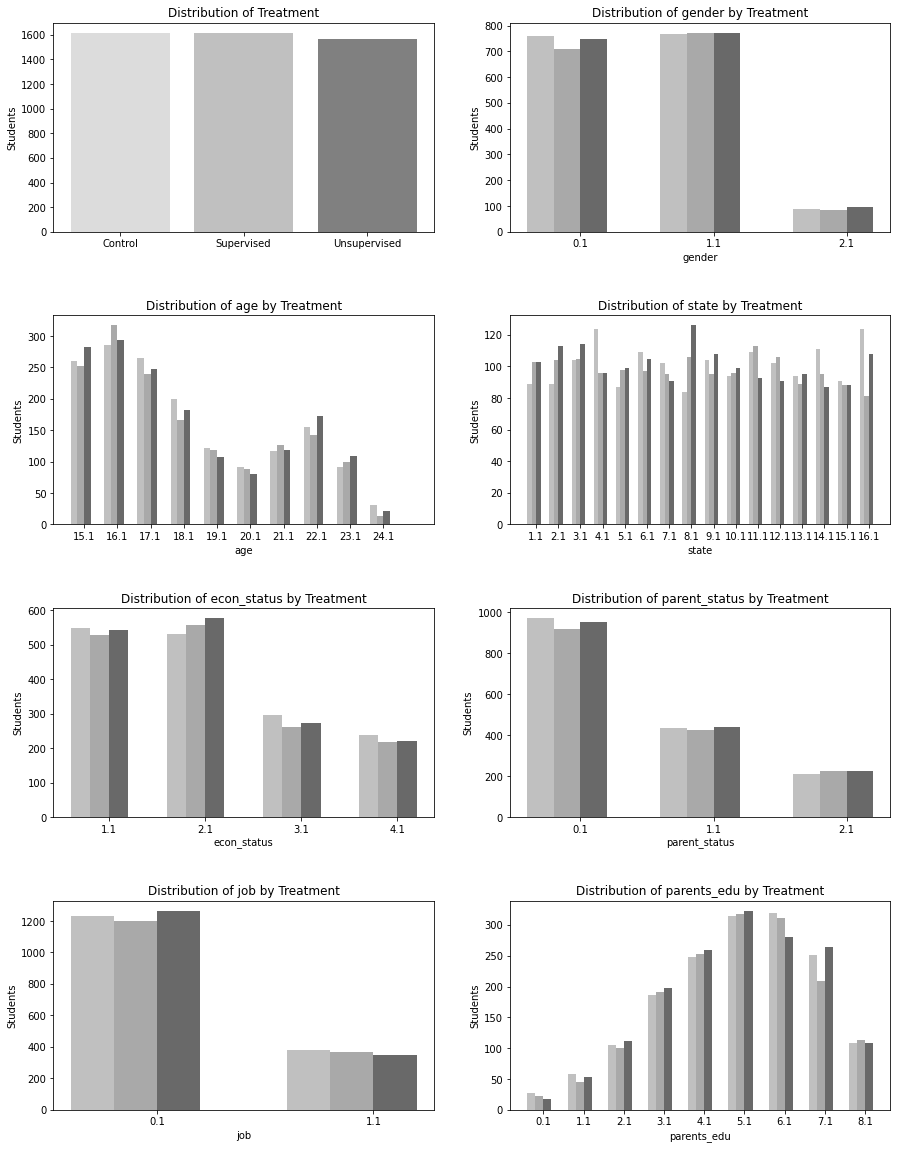

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Remove duplicate rows based on the 'ID' column
df_unique = df.drop_duplicates(subset='ID')

# Create a 4x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Get the number of individuals in each treatment group
treatment_counts = df_unique['treatment'].value_counts()

# Set the x-axis labels and tick marks
x_labels = ['Control', 'Supervised', 'Unsupervised']
x_tick_marks = [0, 1, 2]

# Set the colors for the bars
colors = ['gainsboro', 'silver', 'gray']

# Create the bar plot for treatment distribution and add to first subplot
axs[0, 0].bar(x_tick_marks, treatment_counts, color=colors)
#axs[0, 0].set_xlabel('Treatment')
axs[0, 0].set_ylabel('Students')
axs[0, 0].set_title('Distribution of Treatment')
axs[0, 0].set_xticks(x_tick_marks)
axs[0, 0].set_xticklabels(x_labels)

# Define the columns to plot
columns = ['gender', 'age', 'state', 'econ_status', 'parent_status', 'job', 'parents_edu']

# Define the treatment values to plot
treatments = [0, 1, 2]

# Define the width of each bar
bar_width = 0.2

# Define the colors for each treatment value
colors = ['silver', 'darkgray', 'dimgray']

# Loop over each column to plot
for idx, column in enumerate(columns):

    # Loop over each treatment value to plot
    for i, t in enumerate(treatments):

        # Subset the data for the current treatment value
        df_treatment = df_unique[df_unique['treatment'] == t]

        # Compute the histogram of the current column for the current treatment value
        hist, bins = np.histogram(df_treatment[column], bins=sorted(df_treatment[column].unique()) + [max(df_treatment[column]) + 1])

        # Compute the positions of the bars for the current treatment value
        positions = bins[:-1] + bar_width * (i - len(treatments) / 2 + 0.5)

        # Plot the histogram for the current treatment value in the corresponding subplot
        axs[(idx+1)//2, (idx+1)%2].bar(positions, hist, width=bar_width, label=f'Treatment {t}', color=colors[i])

    # Set the x-axis labels, title, and legend for the current subplot
    axs[(idx+1)//2, (idx+1)%2].set_xlabel(column)
    axs[(idx+1)//2, (idx+1)%2].set_ylabel('Students')
    axs[(idx+1)//2, (idx+1)%2].set_title(f'Distribution of {column} by Treatment')
    axs[(idx+1)//2, (idx+1)%2].set_xticks(bins[:-1] + bar_width / 2)
    #axs[(idx+1)//2, (idx+1)%2].set_xticklabels(sorted(df[column].unique()))
    #axs[(idx+1)//2, (idx+1)%2].legend()

# Adjust the spacing between subplots and display the figure
plt.subplots_adjust(hspace=0.4)
txt="I need the caption to be present a little below X-axis"
plt.show()

fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

# Time-series analysis

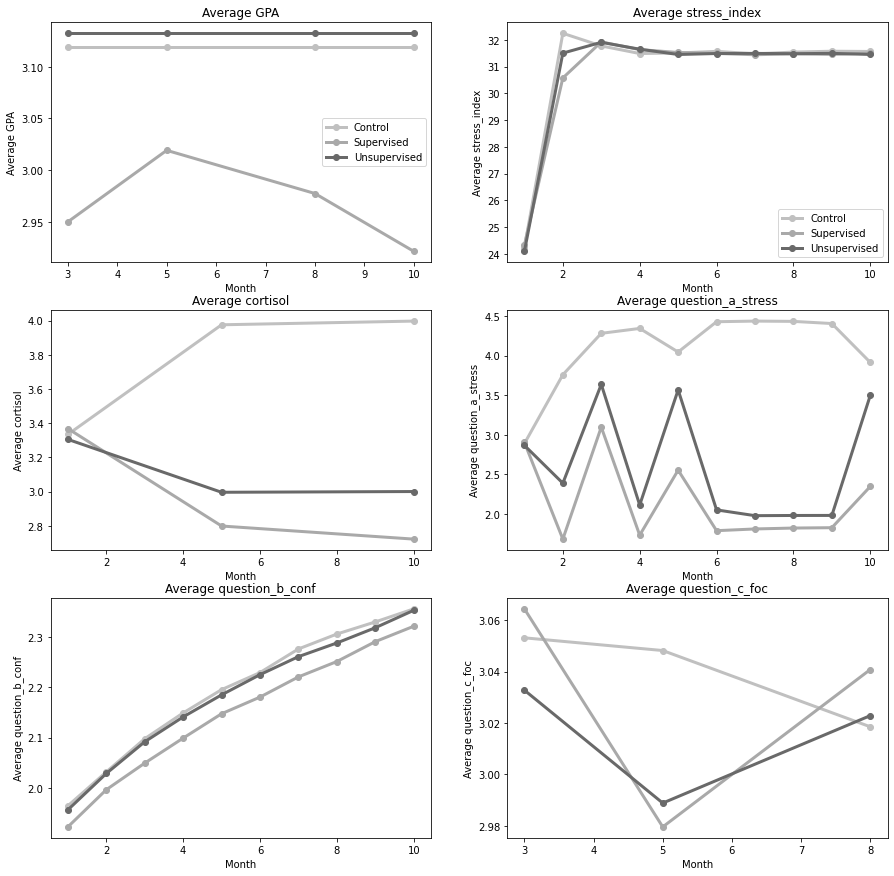

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# subplot 1 - Average GPA over time for each treatment
df_avr_GPA = df[df['Month'].isin([3, 5, 8, 10])]
df_t0 = df_avr_GPA[df_avr_GPA['treatment'] == 0]
df_t1 = df_avr_GPA[df_avr_GPA['treatment'] == 1]
df_t2 = df_avr_GPA[df_avr_GPA['treatment'] == 2]

df_t0_avg = df_t0.groupby('Month')['GPA'].mean()
df_t1_avg = df_t1.groupby('Month')['GPA'].mean()
df_t2_avg = df_t2.groupby('Month')['GPA'].mean()

axs[0, 0].plot(df_t0_avg.index, df_t0_avg, 'o-', color='silver', linewidth=3, label='Control')
axs[0, 0].plot(df_t1_avg.index, df_t1_avg, 'o-', color='darkgray', linewidth=3, label='Supervised')
axs[0, 0].plot(df_t2_avg.index, df_t2_avg, 'o-', color='dimgray', linewidth=3, label='Unsupervised')

axs[0, 0].set_title('Average GPA')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Average GPA')
axs[0, 0].legend()

# subplot 2 - Average stress_index over time for each treatment
df_t0 = df[df['treatment'] == 0]
df_t1 = df[df['treatment'] == 1]
df_t2 = df[df['treatment'] == 2]

df_t0_avg = df_t0.groupby('Month')['stress_index'].mean()
df_t1_avg = df_t1.groupby('Month')['stress_index'].mean()
df_t2_avg = df_t2.groupby('Month')['stress_index'].mean()

axs[0, 1].plot(df_t0_avg.index, df_t0_avg, 'o-', color='silver', linewidth=3, label='Control')
axs[0, 1].plot(df_t1_avg.index, df_t1_avg, 'o-', color='darkgray', linewidth=3, label='Supervised')
axs[0, 1].plot(df_t2_avg.index, df_t2_avg, 'o-', color='dimgray', linewidth=3, label='Unsupervised')

axs[0, 1].set_title('Average stress_index')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Average stress_index')
axs[0, 1].legend()

# subplot 3 - Average cortisol over time for each treatment
df_avr_cortisol = df[df['Month'].isin([1, 5, 10])]
df_t0 = df_avr_cortisol[df_avr_cortisol['treatment'] == 0]
df_t1 = df_avr_cortisol[df_avr_cortisol['treatment'] == 1]
df_t2 = df_avr_cortisol[df_avr_cortisol['treatment'] == 2]

df_t0_avg = df_t0.groupby('Month')['cortisol'].mean()
df_t1_avg = df_t1.groupby('Month')['cortisol'].mean()
df_t2_avg = df_t2.groupby('Month')['cortisol'].mean()

axs[1, 0].plot(df_t0_avg.index, df_t0_avg, 'o-', color='silver', linewidth=3, label='treatment 0')
axs[1, 0].plot(df_t1_avg.index, df_t1_avg, 'o-', color='darkgray', linewidth=3, label='treatment 1')
axs[1, 0].plot(df_t2_avg.index, df_t2_avg, 'o-', color='dimgray', linewidth=3, label='treatment 2')

axs[1, 0].set_title('Average cortisol')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Average cortisol')


# subplot 4 - Average question_a_stress over time for each treatment
df_t0 = df[df['treatment'] == 0]
df_t1 = df[df['treatment'] == 1]
df_t2 = df[df['treatment'] == 2]

df_t0_avg = df_t0.groupby('Month')['question_a_stress'].mean()
df_t1_avg = df_t1.groupby('Month')['question_a_stress'].mean()
df_t2_avg = df_t2.groupby('Month')['question_a_stress'].mean()

axs[1, 1].plot(df_t0_avg.index, df_t0_avg, 'o-', color='silver', linewidth=3, label='treatment 0')
axs[1, 1].plot(df_t1_avg.index, df_t1_avg, 'o-', color='darkgray', linewidth=3, label='treatment 1')
axs[1, 1].plot(df_t2_avg.index, df_t2_avg, 'o-', color='dimgray', linewidth=3, label='treatment 2')

axs[1, 1].set_title('Average question_a_stress')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average question_a_stress')


# subplot 5 - Average question_b_conf over time for each treatment
df_t0 = df[df['treatment'] == 0]
df_t1 = df[df['treatment'] == 1]
df_t2 = df[df['treatment'] == 2]

df_t0_avg = df_t0.groupby('Month')['question_b_conf'].mean()
df_t1_avg = df_t1.groupby('Month')['question_b_conf'].mean()
df_t2_avg = df_t2.groupby('Month')['question_b_conf'].mean()

axs[2, 0].plot(df_t0_avg.index, df_t0_avg, 'o-', color='silver', linewidth=3, label='treatment 0')
axs[2, 0].plot(df_t1_avg.index, df_t1_avg, 'o-', color='darkgray', linewidth=3, label='treatment 1')
axs[2, 0].plot(df_t2_avg.index, df_t2_avg, 'o-', color='dimgray', linewidth=3, label='treatment 2')

axs[2, 0].set_title('Average question_b_conf')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Average question_b_conf')


# subplot 6 - Average question_c_foc over time for each treatment
df_avr_C = df[df['Month'].isin([3, 5, 8])]
df_t0 = df_avr_C[df_avr_C['treatment'] == 0]
df_t1 = df_avr_C[df_avr_C['treatment'] == 1]
df_t2 = df_avr_C[df_avr_C['treatment'] == 2]

df_t0_avg = df_t0.groupby('Month')['question_c_foc'].mean()
df_t1_avg = df_t1.groupby('Month')['question_c_foc'].mean()
df_t2_avg = df_t2.groupby('Month')['question_c_foc'].mean()

axs[2, 1].plot(df_t0_avg.index, df_t0_avg, 'o-', color='silver', linewidth=3, label='treatment 0')
axs[2, 1].plot(df_t1_avg.index, df_t1_avg, 'o-', color='darkgray', linewidth=3, label='treatment 1')
axs[2, 1].plot(df_t2_avg.index, df_t2_avg, 'o-', color='dimgray', linewidth=3, label='treatment 2')

axs[2, 1].set_title('Average question_c_foc')
axs[2, 1].set_xlabel('Month')
axs[2, 1].set_ylabel('Average question_c_foc')

plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

# stress_index fixed effect panel analysis

In [ ]:
df1 = df
Month = pd.Categorical(df1.Month)
df1 = df1.set_index(["ID", "Month"])
df1["Month"] = Month
exog_vars = ["stress_index", "age", "gender", "state", "econ_status", "parent_status", "job", "parents_edu", "Month"]
exog = sm.add_constant(df1[exog_vars])
mod = PanelOLS(df1.GPA, exog, entity_effects=True, drop_absorbed=True, check_rank=False)
fe_res1 = mod.fit()
print(fe_res1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    GPA   R-squared:                        0.0007
Estimator:                   PanelOLS   R-squared (Between):          -9.408e-05
No. Observations:               19200   R-squared (Within):               0.0007
Date:                Mon, Mar 06 2023   R-squared (Overall):              0.0001
Time:                        13:07:45   Log-likelihood                -1.291e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.5570
Entities:                        4800   P-value                           0.0368
Avg Obs:                       4.0000   Distribution:                 F(4,14396)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             2.5570
                            

<ipython-input-50-086a5101d9d4>:8: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

age, gender, state, econ_status, parent_status, job, parents_edu, Month.2, Month.4, Month.6, Month.7, Month.9, Month.10

  fe_res1 = mod.fit()


In [ ]:
df3 = df
Month = pd.Categorical(df3.Month)
df3 = df3.set_index(["ID", "Month"])
df3["Month"] = Month
exog_vars = ["stress_index", "age", "gender", "state", "econ_status", "parent_status", "job", "parents_edu", "Month"]
exog = sm.add_constant(df3[exog_vars])
mod = PanelOLS(df3.GPA, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
fe_res3 = mod.fit()
print(fe_res3)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    GPA   R-squared:                     9.485e-05
Estimator:                   PanelOLS   R-squared (Between):          -9.408e-05
No. Observations:               19200   R-squared (Within):            8.217e-05
Date:                Mon, Mar 06 2023   R-squared (Overall):          -4.936e-05
Time:                        13:07:50   Log-likelihood                -1.291e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.3656
Entities:                        4800   P-value                           0.2426
Avg Obs:                       4.0000   Distribution:                 F(1,14396)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             1.3656
                            

<ipython-input-51-3cd4cdc43b9f>:8: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

age, gender, state, econ_status, parent_status, job, parents_edu, Month.2, Month.3, Month.4, Month.5, Month.6, Month.7, Month.8, Month.9, Month.10

  fe_res3 = mod.fit()


# cortisol fixed effect panel analysis

In [ ]:
df2 = df
Month = pd.Categorical(df2.Month)
df2 = df2.set_index(["ID", "Month"])
df2["Month"] = Month
exog_vars = ["cortisol", "age", "gender", "state", "econ_status", "parent_status", "job", "parents_edu", "Month"]
exog = sm.add_constant(df1[exog_vars])
mod = PanelOLS(df1.GPA, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
fe_res2 = mod.fit()
print(fe_res2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    GPA   R-squared:                        0.0003
Estimator:                   PanelOLS   R-squared (Between):           1.034e-05
No. Observations:                9600   R-squared (Within):               0.0003
Date:                Mon, Mar 06 2023   R-squared (Overall):           5.939e-05
Time:                        13:07:53   Log-likelihood                   -4464.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.3850
Entities:                        4800   P-value                           0.2393
Avg Obs:                       2.0000   Distribution:                  F(1,4798)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             1.3850
                            

<ipython-input-52-81b4f963a142>:8: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

age, gender, state, econ_status, parent_status, job, parents_edu, Month.2, Month.3, Month.4, Month.5, Month.6, Month.7, Month.8, Month.9, Month.10

  fe_res2 = mod.fit()


# Show results in a table

In [ ]:
from pystout import pystout
pystout(models=[fe_res3,fe_res1,fe_res2],
        file='test_table.tex',
        #addnotes=['Here is a little note','And another one'],
        digits=5,
        endog_names=['Stress level FE','Stress level FE (time dummies)','Cortisol level FE'],
        #varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        #addrows={'Test':['A','Test','Row','Here','Too']},
        #mgroups={'Statsmodels':[1,3],'L OLS':4,'L TSLS':5},
        modstat={'nobs':'Obs','rsquared_adj':'Adj. R\sym{2}','fvalue':'F-stat'}
        )
# click files icon on the left, then see "test_table.tex"

# Variable importances based on DT and RF

In [ ]:
# Filter the data to only include rows where the "Month" column is equal to 3, 5, 8, or 10
df_imp = df[df["Month"].isin([3, 5, 8, 10])]

# Create a list of the control variables
control_vars = ["treatment", "parents_edu", "job", "parent_status", "econ_status", "state", "gender", "age"]

# Create a training and test set using 80% of the data for training and 20% for testing
train_df, test_df = train_test_split(df_imp, test_size=0.2, random_state=42)

# Fit a decision tree regression model to the training data
dt = DecisionTreeRegressor()
dt.fit(train_df[control_vars], train_df["GPA"])

# Fit a random forest regression model to the training data
rf = RandomForestRegressor()
rf.fit(train_df[control_vars], train_df["GPA"])

# Get the feature importances from the decision tree and random forest models
dt_importances = dt.feature_importances_
rf_importances = rf.feature_importances_

# Create a dataframe to store the feature importances
importances_df = pd.DataFrame({"Control Variable": control_vars,
                               "Decision Tree Importance score": dt_importances,
                               "Random Forest Importance score": rf_importances})

# Sort the dataframe by the "Random Forest Importance" column to see the most important variables
importances_df = importances_df.sort_values("Random Forest Importance score", ascending=False)

# Generate a LaTeX table and save it to a file
table = importances_df.to_latex(index=False, float_format="{:.2f}".format)
with open("test_table.tex", "w") as f:
    f.write(table)